In [1]:
from IPython.display import display, HTML

# HTML and CSS code for maroon background and white bold title
heading_html = """
<h1 style="font-family: Arial; color: black; text-align: center; background-color: skyblue; padding: 20px;
border-radius: 10px; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.2); font-weight: bold;">
    Customer Segmentation Analysis 
</h1>
"""
# Display the HTML heading
display(HTML(heading_html))


# **INTRODUCTION**
Customer segmentation is the practice of dividing a business’s customers into distinct groups based on shared characteristics. Think of it as sorting customers into "buckets" where each bucket represents a different type of customer. These buckets could be based on factors like age, spending habits, geographic location, or even personality traits.

## Project Description:

The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing strategies, improve customer satisfaction, and enhance overall business strategies.

In [2]:
from IPython.display import display, HTML

# HTML and CSS code for maroon background and white bold title
heading_html = """
<h1 style="font-family: Arial; color: black; text-align: center; background-color: skyblue; padding: 20px;
border-radius: 10px; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.2); font-weight: bold;">
    IMPORTING LIBRARIES
</h1>
"""
# Display the HTML heading
display(HTML(heading_html))

In [3]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
from IPython.display import display, HTML

# HTML and CSS code for maroon background and white bold title
heading_html = """
<h1 style="font-family: Arial; color: black; text-align: center; background-color: skyblue; padding: 20px;
border-radius: 10px; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.2); font-weight: bold;">
    LOADING DATA
</h1>
"""
# Display the HTML heading
display(HTML(heading_html))

In [5]:
#Loading the dataset
data = pd.read_csv("/kaggle/input/customer-segmentation/Customer segmentation.csv")
# Display the dataset and print the number of data points
print("\nNumber of data points:", len(data))
print("Customer Segmentation Dataset:")
data


Number of data points: 2205
Customer Segmentation Dataset:


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [6]:
from IPython.display import display, HTML

# HTML and CSS code for maroon background and white bold title
heading_html = """
<h1 style="font-family: Arial; color: black; text-align: center; background-color: skyblue; padding: 20px;
border-radius: 10px; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.2); font-weight: bold;">
    DATA CLEANING
</h1>
"""
# Display the HTML heading
display(HTML(heading_html))

In [7]:
data.shape

(2205, 39)

In [8]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [9]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [10]:
# Drop the columns, ignoring errors if they don't exist
data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True, errors='ignore')
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

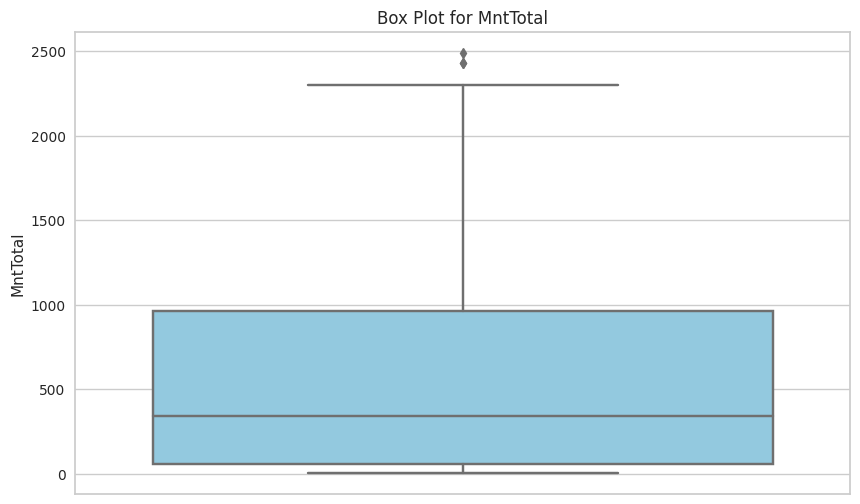

In [11]:
# Boxplot for MntTotal
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['MntTotal'], color='skyblue')
plt.title('Box Plot for MntTotal')
plt.show()

Since there are dots or markers above the upper whisker for MntTotal, these represent high outliers (unusually high spending).

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for MntTotal
Q1= data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3- Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
print(f"Number of outliers in MntTotal (IQR method): {len(outliers)}")
outliers.head()

Number of outliers in MntTotal (IQR method): 3


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [13]:
data_no_outliers = data[(data['MntTotal'] >= lower_bound) & (data['MntTotal'] <= upper_bound)]

# Check the number of rows removed
print(f"Number of rows before removing outliers: {len(data)}")
print(f"Number of rows after removing outliers: {len(data_no_outliers)}")

Number of rows before removing outliers: 2205
Number of rows after removing outliers: 2202


In [14]:
from IPython.display import display, HTML

# HTML and CSS code for maroon background and white bold title
heading_html = """
<h1 style="font-family: Arial; color: black; text-align: center; background-color: skyblue; padding: 20px;
border-radius: 10px; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.2); font-weight: bold;">
    DESCRIPTIVE STATISTICS
</h1>
"""
# Display the HTML heading
display(HTML(heading_html))

In [15]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [16]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [17]:
data.shape

(2205, 37)

In [18]:
# Average Purchase Value (using MntTotal column)
data['AvgPurchaseValue'] = data['MntTotal'] / (data['NumDealsPurchases'] + data['NumWebPurchases'] + 
                                               data['NumCatalogPurchases'] + data['NumStorePurchases'])

# Frequency of Purchases (sum of different types of purchases)
data['PurchaseFrequency'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + \
                            data['NumCatalogPurchases'] + data['NumStorePurchases']

# Displaying the first few rows with new calculated metrics
print(data[['AvgPurchaseValue', 'PurchaseFrequency']].head())

# If you want to find the overall averages of these metrics
avg_purchase_value = data['AvgPurchaseValue'].mean()
purchase_frequency_avg = data['PurchaseFrequency'].mean()

print(f"Average Purchase Value: {avg_purchase_value}")
print(f"Average Purchase Frequency: {purchase_frequency_avg}")


   AvgPurchaseValue  PurchaseFrequency
0         61.160000                 25
1          3.500000                  6
2         34.952381                 21
3          6.000000                  8
4         21.421053                 19
Average Purchase Value: inf
Average Purchase Frequency: 14.88798185941043


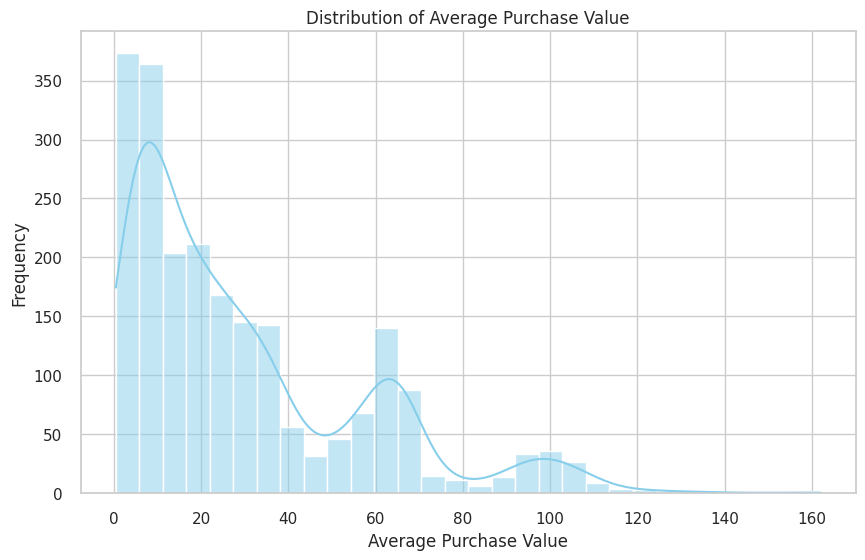

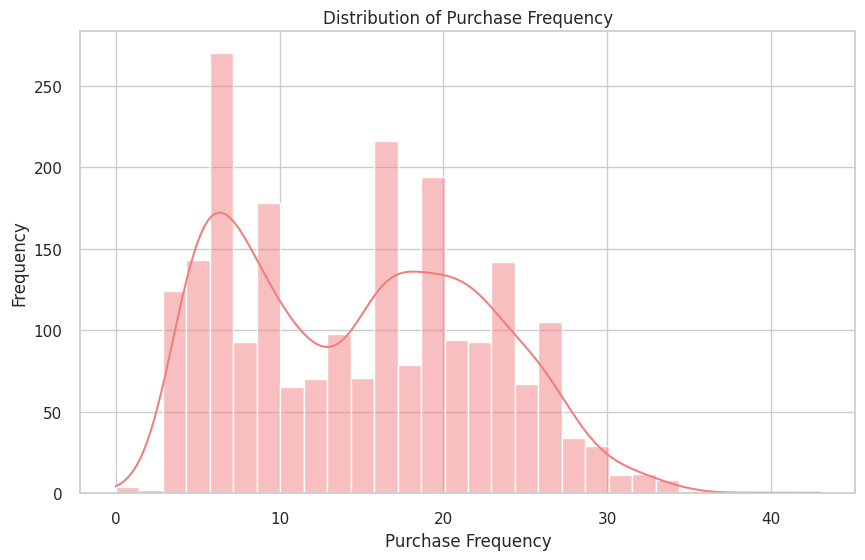

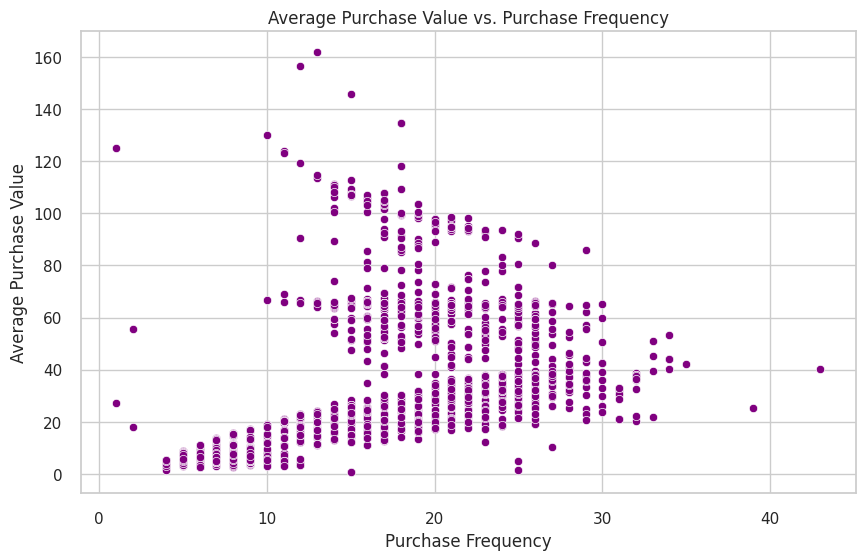

In [19]:
# Set the theme for Seaborn
sns.set_theme(style="whitegrid")

# 1. Distribution of Average Purchase Value
plt.figure(figsize=(10, 6))
sns.histplot(data['AvgPurchaseValue'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Purchase Value')
plt.xlabel('Average Purchase Value')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Purchase Frequency
plt.figure(figsize=(10, 6))
sns.histplot(data['PurchaseFrequency'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.show()

# 3. Scatter Plot: Average Purchase Value vs. Purchase Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseFrequency', y='AvgPurchaseValue', data=data, color='purple')
plt.title('Average Purchase Value vs. Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Purchase Value')
plt.show()


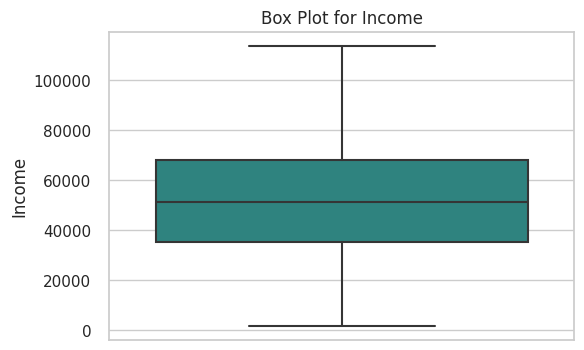

In [20]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

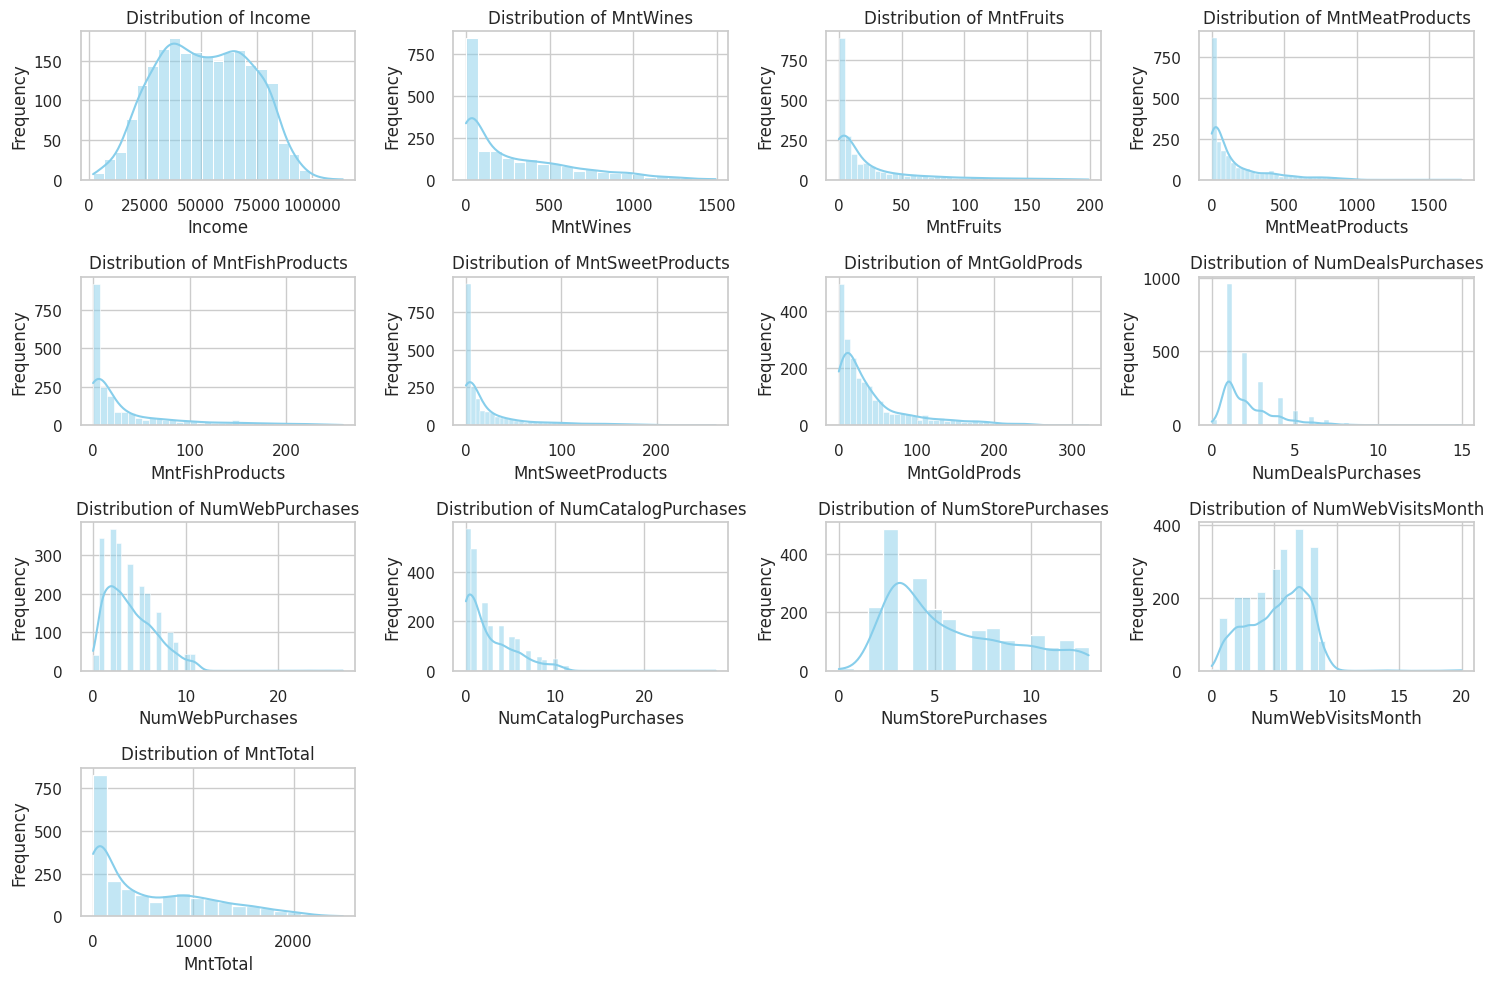

In [21]:
# Plot histograms for numerical columns
numerical_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntTotal']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


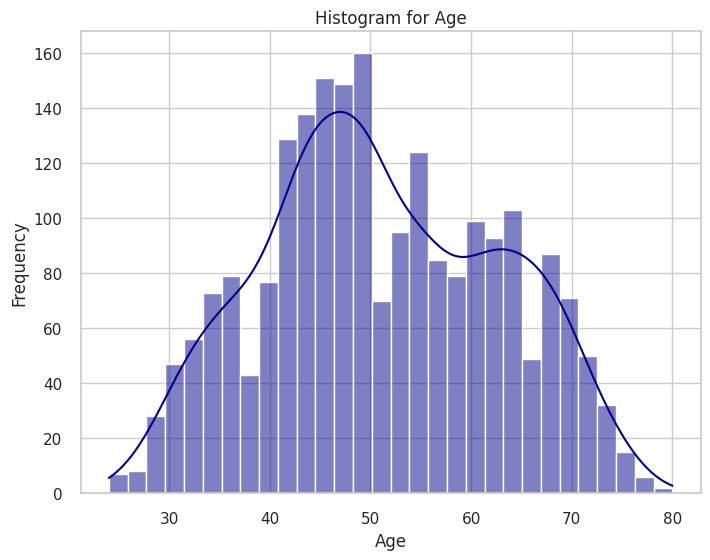

In [22]:
# Histogram for Age
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Age', bins=30, kde=True, color='darkblue')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [23]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.089941
Kurtosis: -0.797036


The age distribution looks approximately symmetrical and the left and right sides of distribution are roughly equal. Skewness of 0.09 (close to zero) supports the visual observation of the distribution. Kurtosis of -0.8 suggests that the distribution is close to normal with lighter tails and less peaked than a normal distribution.

# Correlation Matrix Analysis

Given the large number of columns in the dataset, the correlation matrix can become quite crowded if all columns are included. To manage this complexity, we will focus on examining the correlation between selected groups of columns and the column 'MntTotal'.

## The approach includes:

Grouping Columns: We will categorize columns into relevant groups to simplify the analysis.

Exploring Correlations: For each group, we will analyze the correlation with 'MntTotal', which represents the total spending by customers. This helps us identify how different factors relate to overall spending.

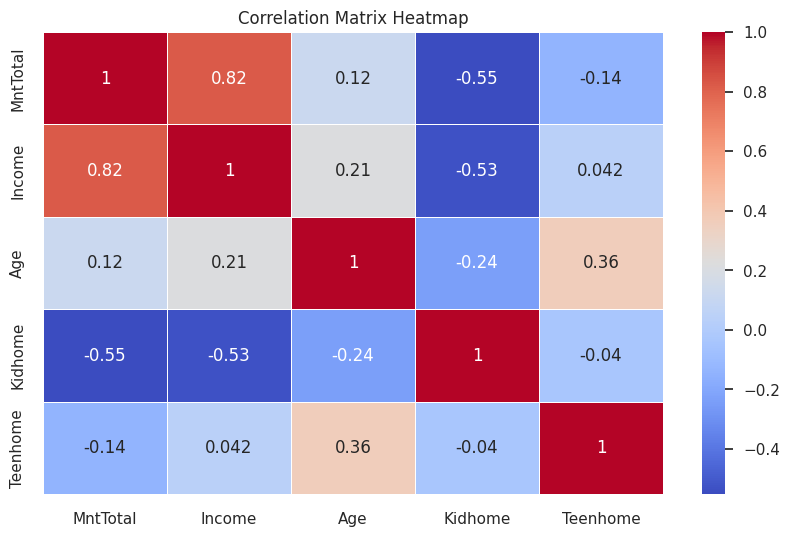

In [24]:
# Define column groups
cols_demographics = ['Income', 'Age']
cols_children = ['Kidhome', 'Teenhome']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Combine relevant columns for correlation matrix
cols_for_corr = cols_mnt + cols_demographics + cols_children

# Compute the correlation matrix
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

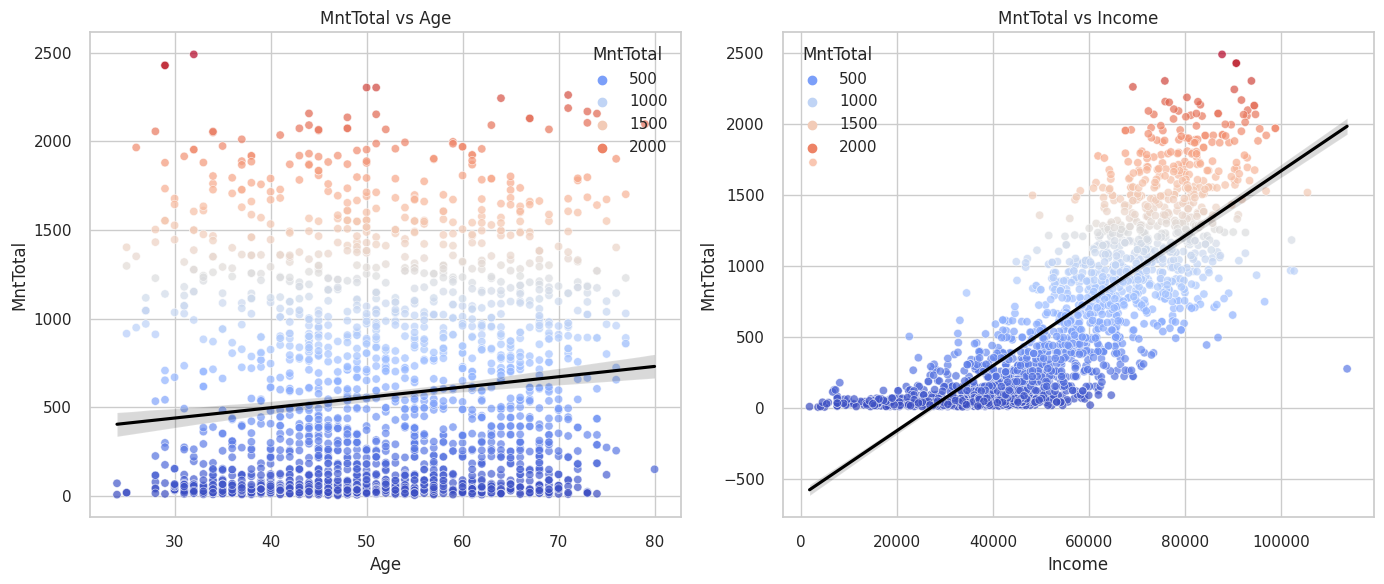

In [25]:
# Define the variables for the scatter plots
variables = ['Age', 'Income']

# Create subplots
plt.figure(figsize=(14, 6))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=data, x=var, y='MntTotal', hue='MntTotal', palette='coolwarm', alpha=0.7)
    sns.regplot(data=data, x=var, y='MntTotal', scatter=False, color='black')
    plt.title(f'MntTotal vs {var}')
    plt.xlabel(var)
    plt.ylabel('MntTotal')

plt.tight_layout()
plt.show()

These plots are useful for visualizing and understanding how total spending ('MntTotal') varies with different customer characteristics ('Age' and 'Income'). They help in identifying trends and patterns that can guide customer segmentation and marketing strategies.  As you see a cluster of points that trend upwards as income increases, it indicates a positive correlation. Conversely, if points are scattered without a clear pattern,as in case of 'Age', the relationship might be weak.

Text(0, 0.5, 'MntTotal')

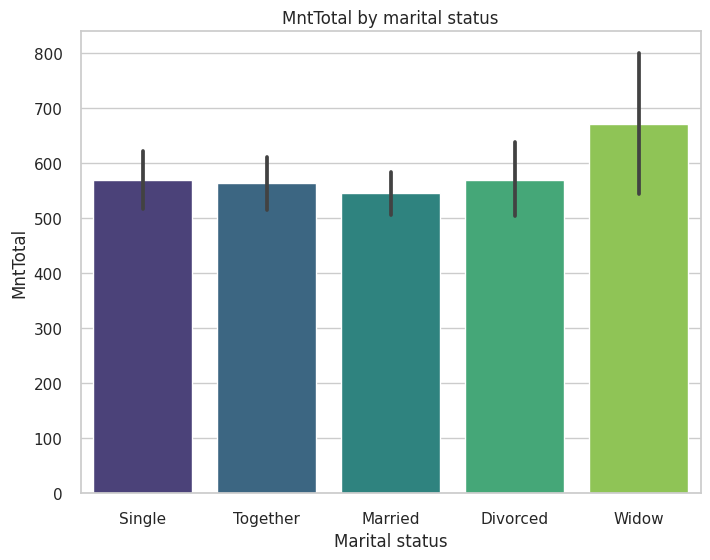

In [26]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [27]:
#New feature: In_relationship
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AvgPurchaseValue,PurchaseFrequency,Marital,In_relationship
0,58138,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,61.160000,25,Single,0
1,46344,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,3.500000,6,Single,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,34.952381,21,Together,1
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,6.000000,8,Together,1
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,21.421053,19,Married,1


In [28]:
from IPython.display import display, HTML

# HTML and CSS code for maroon background and white bold title
heading_html = """
<h1 style="font-family: Arial; color: black; text-align: center; background-color: skyblue; padding: 20px;
border-radius: 10px; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.2); font-weight: bold;">
    CLUSTERING
</h1>
"""
# Display the HTML heading
display(HTML(heading_html))

# K-Means Clustering
K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. K-means clustering usually works well in practice and scales well to the large datasets.

In this section:

* Standardising data
* Principal Component Analysis (PCA)
* Elbow method
* Silhouette score analysis

In [29]:
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


The mean value for all colums is almost zero and the standard deviation is almost 1. All the data points were replaced by their z-scores.

In [30]:
#Principal Component Analysis (PCA)
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

The code performs Principal Component Analysis (PCA) to reduce the dimensionality of a dataset for easier analysis. It starts by importing the necessary PCA class from Scikit-learn’s decomposition module. A PCA object is then created to reduce the dataset to 2 principal components, capturing the maximum variance in the data. The 'fit_transform' method is used to compute these components and project the original data onto them. Finally, the results, which consist of the transformed data along the two principal components, are added back to the original dataset as new columns, pc1 and pc2, enabling simplified visualization or further analysis.

In [31]:
#Elbow method
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

When using the Elbow method to determine the optimal number of clusters, inertia is plotted against the number of clusters. As the number of clusters increases, inertia typically decreases because clusters become smaller and data points are closer to their centroids. The "elbow" in the plot—the point where the rate of decrease slows down—indicates a balance between the number of clusters and the inertia, suggesting an optimal number of clusters for the data.

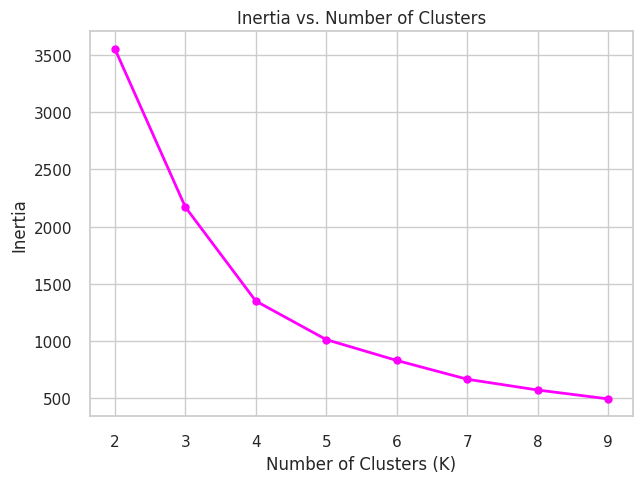

In [32]:
color = 'magenta'

plt.figure(figsize=[7, 5])
plt.plot(range(2, 10), inertia_list, color=color, marker='o', linestyle='-', linewidth=2)
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)  # Adding grid for better readability
plt.show()

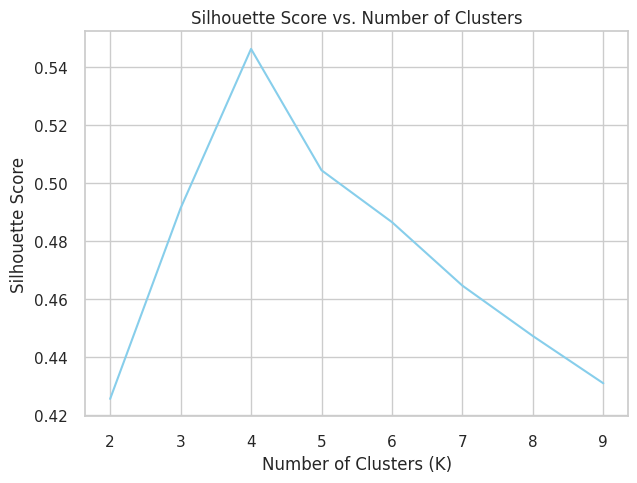

In [33]:
#Silhouette score analysis
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color='skyblue')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


The code snippet assesses the quality of K-Means clustering results by calculating the Silhouette score for different numbers of clusters. It starts by importing the silhouette_score function from Scikit-learn’s metrics module. An empty list, silhouette_list, is initialized to store the scores. The code then iterates through potential cluster counts ranging from 2 to 9. For each number of clusters 𝐾, a K-Means model is created and fitted to the data. The fit_predict method assigns data points to clusters, and the Silhouette score is computed to measure how well-separated and cohesive the clusters are. This score, representing the average distance between data points and their own cluster versus other clusters, is appended to silhouette_list. This analysis helps determine the optimal number of clusters by evaluating which 𝐾 provides the best clustering quality.
* The graph helps in identifying the optimal number of clusters by showing which 𝐾 maximizes the Silhouette score, indicating the most appropriate clustering configuration for the dataset.

In [34]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

In [35]:
from IPython.display import display, HTML

# HTML and CSS code for maroon background and white bold title
heading_html = """
<h1 style="font-family: Arial; color: black; text-align: center; background-color: skyblue; padding: 20px;
border-radius: 10px; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.2); font-weight: bold;">
    Visualisation of Clusters
</h1>
"""
# Display the HTML heading
display(HTML(heading_html))

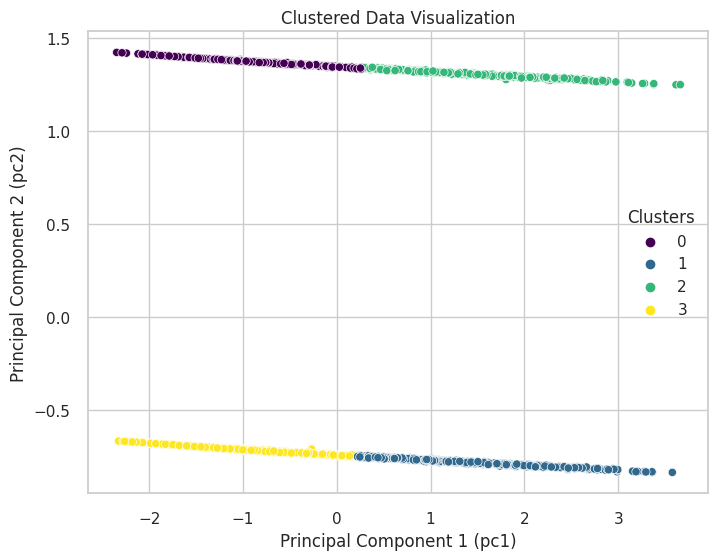

In [36]:
#Exploration of Clusters
#Visualisation of clusters#
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [37]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,37332.339956,150.761589,0.0
1,71865.747350,1150.915194,1.0
2,72059.439394,1167.306061,0.0
3,37920.024533,158.845794,1.0


In [38]:
#Mean consumption of different product types by cluster
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
1,1,1150.915194,1080.148410,624.773852,52.750883,342.715548,75.738516,54.936396,70.766784
2,2,1167.306061,1092.893939,617.148485,55.324242,361.278788,77.703030,55.851515,74.412121
3,3,158.845794,134.119159,92.410047,7.660047,39.426402,11.417056,7.932243,24.726636


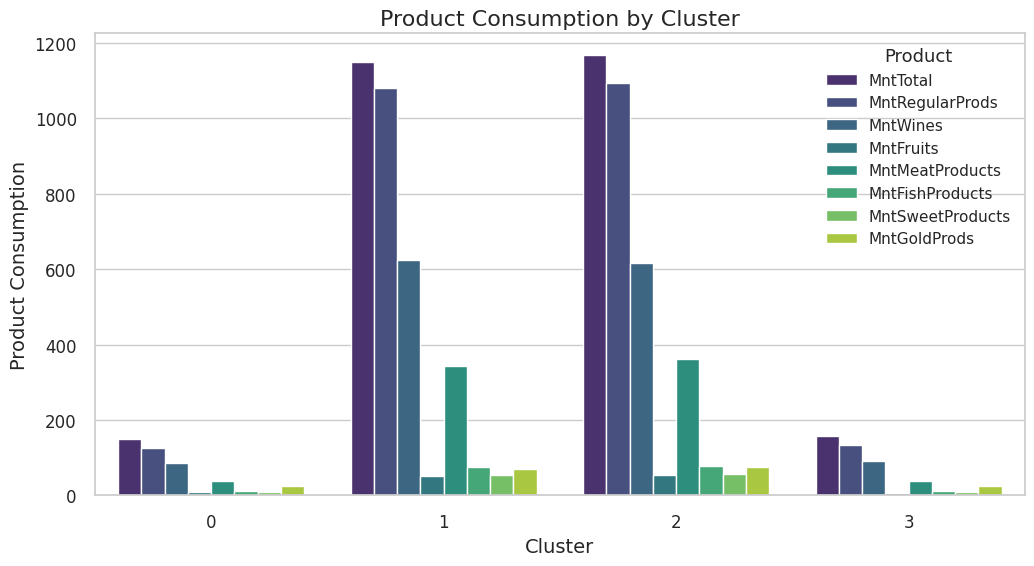

In [39]:
# Melt the DataFrame to reshape for plotting
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")

# Customize the plot with titles and labels
plt.title("Product Consumption by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Product Consumption", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Improve legend appearance and placement
plt.legend(title="Product", loc="upper right", title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

Text(0, 0.5, 'MntTotal')

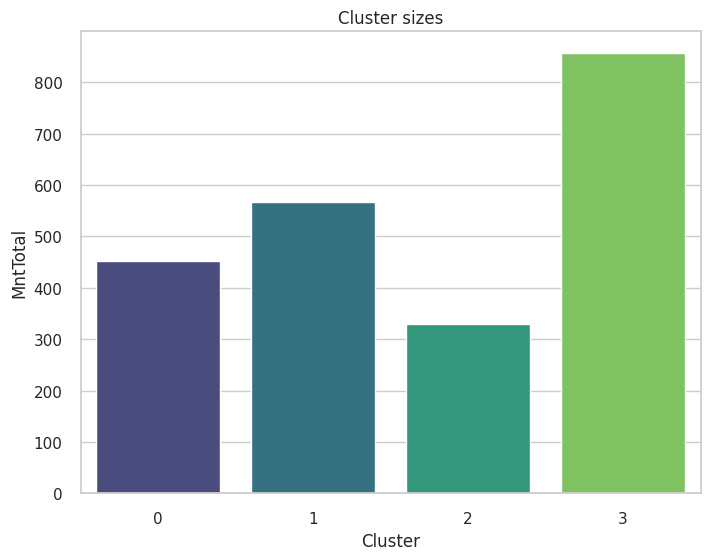

In [40]:
#Cluster sizes
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [41]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,453,21.0
1,1,566,26.0
2,2,330,15.0
3,3,856,39.0


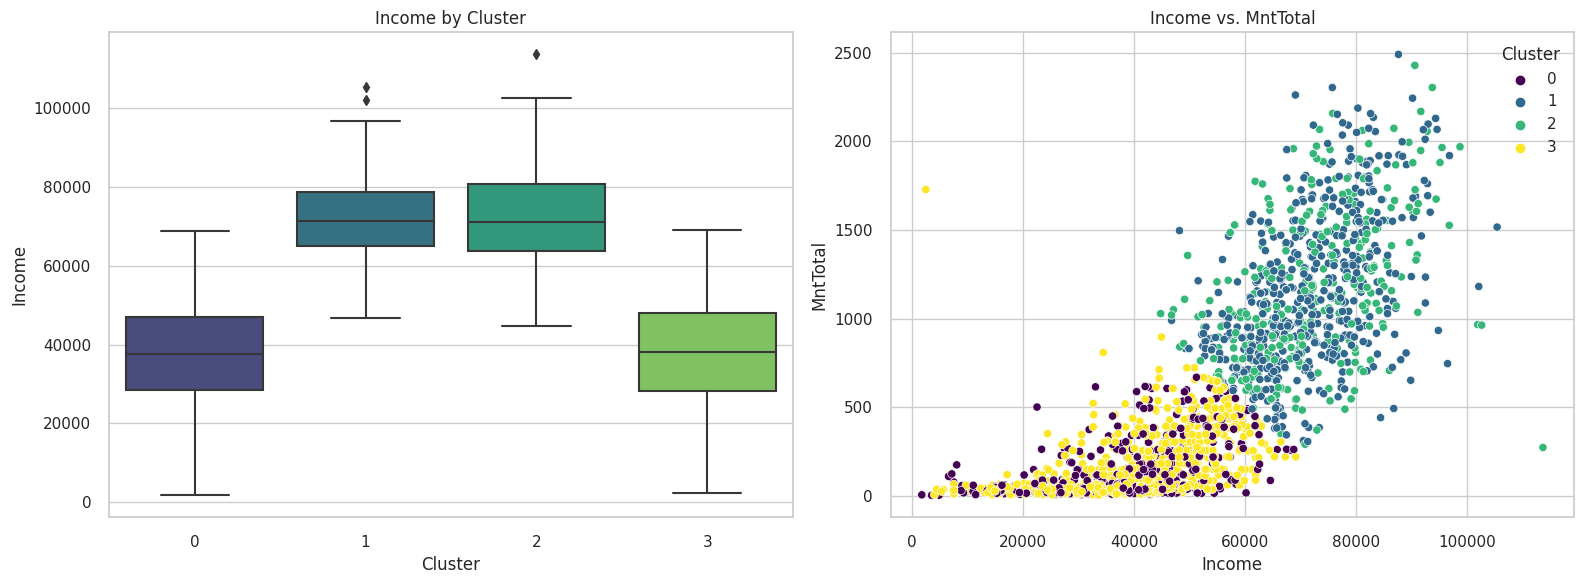

In [42]:
# Create a figure with two subplots arranged side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Box plot
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis', ax=axes[0])
axes[0].set_title('Income by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Income')

# Scatter plot
sns.scatterplot(x='Income', y='MntTotal', data=data, hue='Cluster', palette='viridis', ax=axes[1])
axes[1].set_title('Income vs. MntTotal')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('MntTotal')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

     

Text(0, 0.5, 'In_relationship')

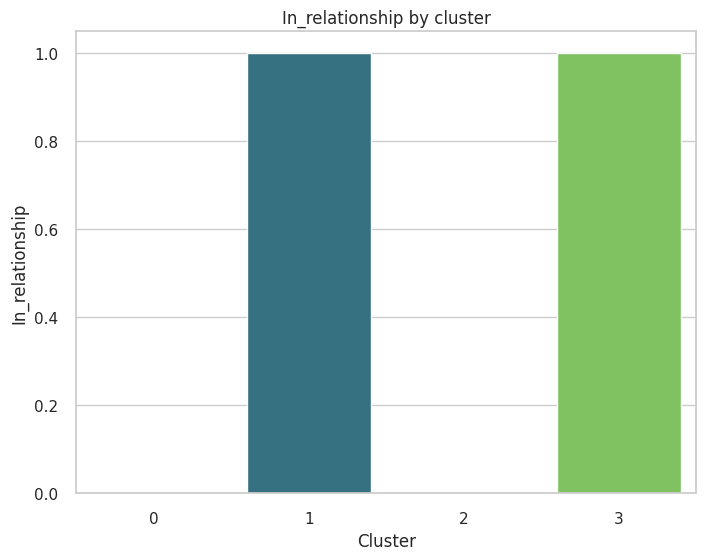

In [43]:
#IN relationship feature by cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=data, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

# Results
This section contains the results of the K-means clustering analysis, which aimed to identify distinct customer segments based on the total amount of purchases they made (MntTotal). The analysis utilised 'Income' and 'In_relationship' features.

## Optimal number of clusters = 4
The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). The elbow method highlighted the number of 4 or 5 clusters as a reasonable number of clusters. The silhouette score analysis revealed a peak silhouette score for k=4.

# Cluster Characteristics

## Cluster 0: High Value Customers in Relationships
* Representation: 26% of the customer base.
* Characteristics: These customers have high incomes and are in a relationship (either married or living together). They are considered high-value due to their higher income and commitment status.
 
## Cluster 1: Low Value Single Customers

* Representation: 21% of the customer base.
* Characteristics: This group consists of customers with low incomes who are single. They are categorized as low-value due to their lower income and single status.

## Cluster 2: High Value Single Customers

* Representation: 15% of the customer base.
* Characteristics: These customers have high incomes and are single. Despite being single, their high income makes them a valuable segment.

## Cluster 3: Low Value Customers in Relationships

* Representation: 39% of the customer base.
* Characteristics: This largest cluster includes customers with low incomes who are in a relationship. They represent the largest portion of the customer base but are low-value due to their income level, despite their relationship status.



# Marketing Strategies for Each Cluster: Recommmendations
## Cluster 0: High Value Customers in Relationships (26%)
Strategy: Focus on promoting high-quality wines and fruits, as these customers have shown a preference for these products.

Approach: Create family-oriented marketing campaigns featuring premium wines and gourmet fruits. Use imagery that resonates with relationships and family life, such as romantic dinners or family gatherings.

Rationale: Given their high income and relationship status, these customers are likely to appreciate and invest in premium products and family-oriented promotions.

## Cluster 1: Low Value Single Customers (21%)

Strategy: Offer discounts and coupons to make products more affordable and appealing.

Approach: Develop targeted promotions that include special discounts, loyalty programs, and incentives to encourage repeat purchases.

Rationale: With lower income and single status, this group is price-sensitive. Incentivizing purchases through discounts and building loyalty can help boost their engagement and purchasing frequency.

## Cluster 2: High Value Single Customers (15%)

Strategy: Similar to Cluster 0, these customers also show a preference for wines and fruits.

Approach: Tailor marketing materials to focus on single lifestyles, such as social gatherings, parties, or solo adventures. Highlight products in contexts that appeal to single individuals, like entertaining friends or personal indulgence.

Rationale: Despite their single status, their high income and product preferences align closely with those of Cluster 0, so using similar product-focused strategies but with single-oriented imagery will be effective.

## Cluster 3: Low Value Customers in Relationships (39%)

Strategy: Utilize family offers and discounts to appeal to this large segment.

Approach: Promote products with special family-oriented deals and discounts. Create campaigns that emphasize value and practical benefits, such as bulk buys or savings on family essentials.

Rationale: As the largest segment, this group is price-sensitive and family-focused. Tailoring promotions to offer value and address their family-oriented needs can help increase their purchasing frequency and overall engagement.